<a href="https://colab.research.google.com/github/luisabgv/luisabgv.github.io/blob/master/Covid19_Deaths_by_Race.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [220]:
#Import Pandas Library
import pandas as pd

In [ ]:
# Provisional COVID-19 Death Counts by County and Race
# https://catalog.data.gov/dataset/provisional-covid-19-death-counts-by-county-and-race-330af

In [235]:
pd.options.display.float_format = '{:.2f}'.format

In [236]:
#load data COVID-19 death counts by county and race
data = pd.read_csv("/content/drive/MyDrive/datasets/Provisional_COVID-19_Death_Counts_by_County_and_Race.csv")

In [237]:
#check num of rows and columns 
data.shape

(2199, 21)

In [238]:
#Get info about my data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 21 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Data as of                                              2199 non-null   object 
 1   Start Date                                              2199 non-null   object 
 2   End Date                                                2199 non-null   object 
 3   State                                                   2199 non-null   object 
 4   County Name                                             2199 non-null   object 
 5   Urban Rural Code                                        2199 non-null   int64  
 6   FIPS State                                              2199 non-null   int64  
 7   FIPS County                                             2199 non-null   int64  
 8   FIPS Code                             

In [239]:
#Get an overview of my data (description)
data.describe()

,Urban Rural Code,FIPS State,FIPS County,FIPS Code,Total deaths,COVID-19 Deaths,Non-Hispanic White,Non-Hispanic Black,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic,Other
count,2199.00,2199.00,2199.00,2199.00,2199.00,2199.00,2197.00,1896.00,1032.00,1375.00,809.00,1744.00,1121.00
mean,3.16,29.26,104.07,29366.01,4482.26,631.05,0.73,0.14,0.02,0.03,0.00,0.12,0.02
std,1.26,15.80,129.44,15830.18,6753.81,1200.19,0.20,0.15,0.08,0.05,0.01,0.15,0.02
min,1.00,1.00,1.00,1003.00,430.00,101.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,16.00,29.00,16019.00,1380.00,163.00,0.61,0.04,0.00,0.01,0.00,0.03,0.01
50%,3.00,29.00,71.00,29161.00,2289.00,277.00,0.78,0.09,0.00,0.02,0.00,0.06,0.02
75%,4.00,42.00,123.00,42087.00,4975.00,599.00,0.90,0.20,0.01,0.04,0.00,0.14,0.02
max,6.00,56.00,840.00,56025.00,101249.00,19846.00,1.00,0.81,0.93,0.53,0.24,0.99,0.25


In [240]:
#Remove No needed columns in the analysis
del data['Data as of']
del data['Start Date']
del data['End Date']
del data['Urban Rural Code']
del data['FIPS State']
del data['FIPS County']
del data['FIPS Code']
del data['Urban Rural Description']
del data['Other']
del data['Footnote']


#check again the num of rows and columns
data.shape

(2199, 11)

In [241]:
#Preview of my data frame
data.head()

,State,County Name,Indicator,Total deaths,COVID-19 Deaths,Non-Hispanic White,Non-Hispanic Black,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic
0,AK,Anchorage Municipality,Distribution of all-cause deaths (%),2662,182,0.58,0.05,0.21,0.06,0.03,0.03
1,AK,Anchorage Municipality,Distribution of COVID-19 deaths (%),2662,182,0.32,nan,0.34,0.15,0.09,nan
2,AK,Anchorage Municipality,Distribution of population (%),2662,182,0.56,0.05,0.08,0.10,0.03,0.09
3,AL,Baldwin County,Distribution of all-cause deaths (%),2806,240,0.90,0.08,nan,nan,nan,0.01
4,AL,Baldwin County,Distribution of COVID-19 deaths (%),2806,240,0.86,0.12,nan,nan,nan,nan


In [242]:
#Preview last rows of my data frame
data.tail(5)

,State,County Name,Indicator,Total deaths,COVID-19 Deaths,Non-Hispanic White,Non-Hispanic Black,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic
2194,WY,Laramie County,Distribution of COVID-19 deaths (%),1200,117,0.75,nan,nan,nan,nan,0.20
2195,WY,Laramie County,Distribution of population (%),1200,117,0.79,0.02,0.01,0.01,0.00,0.15
2196,WY,Natrona County,Distribution of all-cause deaths (%),1253,174,0.91,0.01,0.04,nan,nan,0.04
2197,WY,Natrona County,Distribution of COVID-19 deaths (%),1253,174,0.81,nan,0.12,nan,nan,0.06
2198,WY,Natrona County,Distribution of population (%),1253,174,0.86,0.01,0.01,0.01,0.00,0.09


In [243]:
#Get the mean for each column
column_means = data.mean()
#Replace empty NaN values with the mean for each column
data.fillna(column_means, inplace=True)
#check again my data frame
data.head()

,State,County Name,Indicator,Total deaths,COVID-19 Deaths,Non-Hispanic White,Non-Hispanic Black,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic
0,AK,Anchorage Municipality,Distribution of all-cause deaths (%),2662,182,0.58,0.05,0.21,0.06,0.03,0.03
1,AK,Anchorage Municipality,Distribution of COVID-19 deaths (%),2662,182,0.32,0.14,0.34,0.15,0.09,0.12
2,AK,Anchorage Municipality,Distribution of population (%),2662,182,0.56,0.05,0.08,0.10,0.03,0.09
3,AL,Baldwin County,Distribution of all-cause deaths (%),2806,240,0.90,0.08,0.02,0.03,0.00,0.01
4,AL,Baldwin County,Distribution of COVID-19 deaths (%),2806,240,0.86,0.12,0.02,0.03,0.00,0.12


In [244]:
#Drop rows with empty values 
data.dropna(inplace=True)

#Check for duplicated values
data.duplicated()

#Delete duplicates
data.drop_duplicates(inplace = True)

#Check again my data frame
data.head(5)

,State,County Name,Indicator,Total deaths,COVID-19 Deaths,Non-Hispanic White,Non-Hispanic Black,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Hispanic
0,AK,Anchorage Municipality,Distribution of all-cause deaths (%),2662,182,0.58,0.05,0.21,0.06,0.03,0.03
1,AK,Anchorage Municipality,Distribution of COVID-19 deaths (%),2662,182,0.32,0.14,0.34,0.15,0.09,0.12
2,AK,Anchorage Municipality,Distribution of population (%),2662,182,0.56,0.05,0.08,0.10,0.03,0.09
3,AL,Baldwin County,Distribution of all-cause deaths (%),2806,240,0.90,0.08,0.02,0.03,0.00,0.01
4,AL,Baldwin County,Distribution of COVID-19 deaths (%),2806,240,0.86,0.12,0.02,0.03,0.00,0.12


In [245]:
#Now that we have our data set clean, we apply correlation to our data frame
data.corr 

<bound method DataFrame.corr of      State  ... Hispanic
0       AK  ...     0.03
1       AK  ...     0.12
2       AK  ...     0.09
3       AL  ...     0.01
4       AL  ...     0.12
...    ...  ...      ...
2194    WY  ...     0.20
2195    WY  ...     0.15
2196    WY  ...     0.04
2197    WY  ...     0.06
2198    WY  ...     0.09

[2199 rows x 11 columns]>

In [246]:
#Rename the columns for easier process 
new_name_dic = {'Non-Hispanic White': 'White',
                'Non-Hispanic Black': 'Black',
                'Non-Hispanic American Indian or Alaska Native': 'American Indian or Alaska Native', 
                'Non-Hispanic Asian' : 'Asian',
                'Non-Hispanic Native Hawaiian or Other Pacific Islander' : 'Hawaiian or Pacific Islander'}
data.rename(columns=new_name_dic, inplace= True)
data.columns

Index(['State', 'County Name', 'Indicator', 'Total deaths', 'COVID-19 Deaths',
       'White', 'Black', 'American Indian or Alaska Native', 'Asian',
       'Hawaiian or Pacific Islander', 'Hispanic'],
      dtype='object')

In [247]:
data.head()

,State,County Name,Indicator,Total deaths,COVID-19 Deaths,White,Black,American Indian or Alaska Native,Asian,Hawaiian or Pacific Islander,Hispanic
0,AK,Anchorage Municipality,Distribution of all-cause deaths (%),2662,182,0.58,0.05,0.21,0.06,0.03,0.03
1,AK,Anchorage Municipality,Distribution of COVID-19 deaths (%),2662,182,0.32,0.14,0.34,0.15,0.09,0.12
2,AK,Anchorage Municipality,Distribution of population (%),2662,182,0.56,0.05,0.08,0.10,0.03,0.09
3,AL,Baldwin County,Distribution of all-cause deaths (%),2806,240,0.90,0.08,0.02,0.03,0.00,0.01
4,AL,Baldwin County,Distribution of COVID-19 deaths (%),2806,240,0.86,0.12,0.02,0.03,0.00,0.12


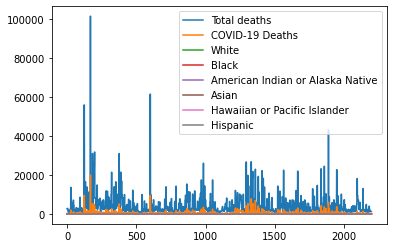

In [248]:
data.plot()

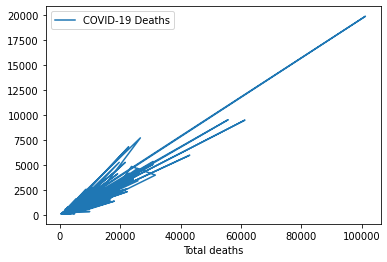

In [249]:
data.plot(x="Total deaths", y="COVID-19 Deaths")

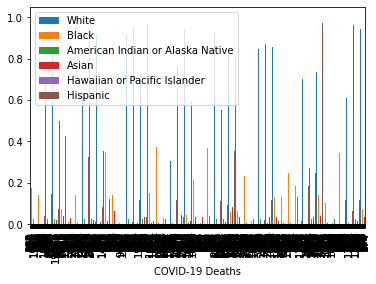

In [250]:
data.plot.bar(x="COVID-19 Deaths", y=['White','Black','American Indian or Alaska Native','Asian','Hawaiian or Pacific Islander','Hispanic'])

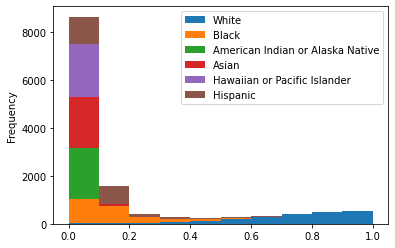

In [ ]:
data.plot.hist(x="COVID-19 Deaths", y=['White','Black','American Indian or Alaska Native','Asian','Hawaiian or Pacific Islander','Hispanic'], stacked=True, bins=10)